In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers_BP.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


##### Let's check the null values in the dataframe

In [6]:
df.isnull().mean()*100

CustomerID                0.0
Genre                     0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

Data is clean without any null values

#### Exploratory Data Analysis

In [7]:
# CustomerID column
df['CustomerID'].nunique()

200

CustomerID is an identifier column with all distinct values in it

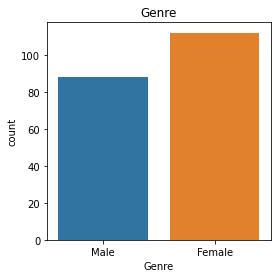

In [8]:
# Genre column
plt.figure(figsize=(4,4))
sns.countplot(df['Genre'])
plt.title('Genre')
plt.show()

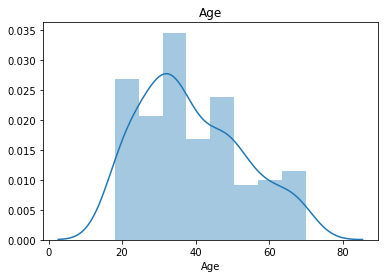

In [9]:
# Age column
sns.distplot(df['Age'])
plt.title('Age')
plt.show()

Age column follows a gaussian distribution, i.e good numerical feature

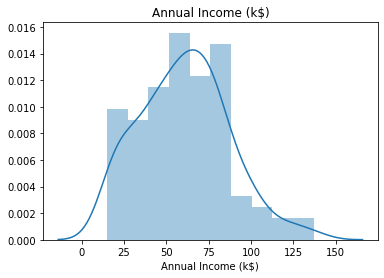

In [10]:
# Annual Income (k$) column
sns.distplot(df['Annual Income (k$)'])
plt.title('Annual Income (k$)')
plt.show()

Annual Income (k$) also follows a normal distribution, i.e a good numerical feature

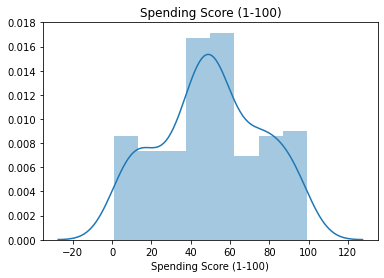

In [11]:
# Spending Score (1-100) column
sns.distplot(df['Spending Score (1-100)'])
plt.title('Spending Score (1-100)')
plt.show()

Spending Score (1-100) column also follows a normal curve distribution, i.e a good feature

### Inference: All our numerical features are normally distributed, this is a good sign of clean data

### Scaling the data using Standardisation technique i.e brining down mean to 0 & variance to 1

In [12]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
num_cols

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [13]:
# Let's remove the CustomerID from numerical columns list to avoid scaling it
num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [15]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,-1.424569,-1.738999,-0.434801
1,2,Male,-1.281035,-1.738999,1.195704
2,3,Female,-1.352802,-1.700830,-1.715913
3,4,Female,-1.137502,-1.700830,1.040418
4,5,Female,-0.563369,-1.662660,-0.395980


#### Clustering can be performed different types on our data
1. Using Age & Spending Score
2. Using Annual Income & Spending Score
3. Using Age & Annual Income

## KMeans clustering

In [16]:
from sklearn.cluster import KMeans

##### Let's perform clustering for Age & Speding Score by taking data of only those two columns

In [17]:
# Map the Genre values with binary 0|1 for convenience
df['Genre'] = df['Genre'].map({'Male':0,'Female':1})

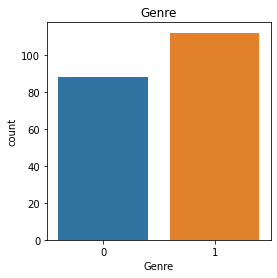

In [18]:
plt.figure(figsize=(4,4))
sns.countplot(df['Genre'])
plt.title('Genre')
plt.show()

In [19]:
data = df.iloc[:,[1,4]].values

#### Finding the optimal K value using Elbow curve method

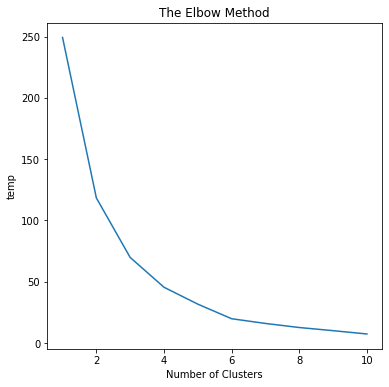

In [20]:
temp = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 100)
    kmeans.fit(data)
    temp.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (6, 6)
plt.title('The Elbow Method')
plt.plot(range(1, 11), temp)
plt.xlabel('Number of Clusters')
plt.ylabel('temp')
plt.show()

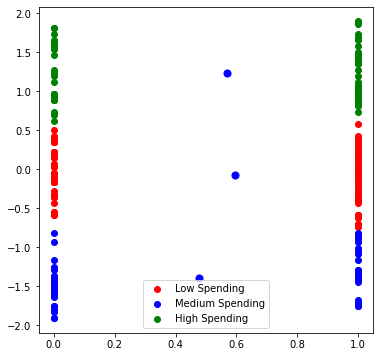

In [21]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 100)
ymeans = kmeans.fit_predict(data)

plt.rcParams['figure.figsize'] = (6, 6)
plt.scatter(data[ymeans == 0, 0], data[ymeans == 0, 1], c = 'red', label = 'Low Spending')
plt.scatter(data[ymeans == 1, 0], data[ymeans == 1, 1], c = 'blue', label = 'Medium Spending')
plt.scatter(data[ymeans == 2, 0], data[ymeans == 2, 1], c = 'green', label = 'High Spending')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, color = 'blue')
plt.legend(loc='best')
plt.show()

### Inference: Both Male & female have similar kind of clustering, hence this clustering is of no use

#### Let's perform clustering on Annual Income & Spending Score

In [22]:
data = df.iloc[:, [3,4]].values

#### Finding the optimal K value using Elbow curve method

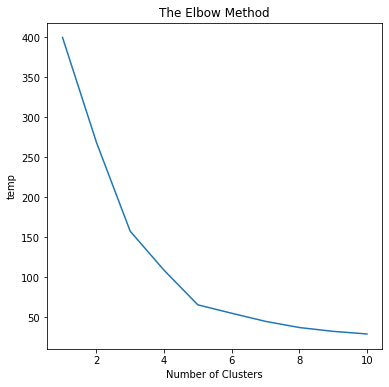

In [23]:
temp = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 100)
    kmeans.fit(data)
    temp.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (6, 6)
plt.title('The Elbow Method')
plt.plot(range(1, 11), temp)
plt.xlabel('Number of Clusters')
plt.ylabel('temp')
plt.show()

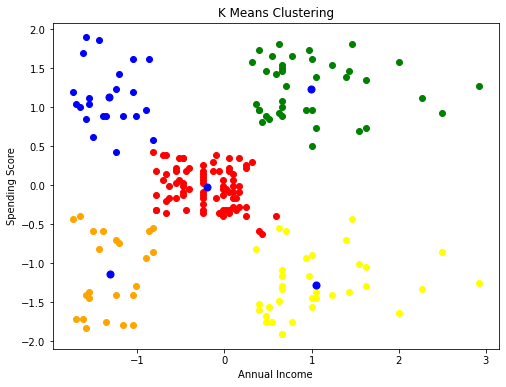

In [24]:
kmeans = KMeans(n_clusters = 5, max_iter = 300, n_init = 10, random_state = 100)
obj = kmeans.fit_predict(data)

plt.figure(figsize=(8,6))
plt.scatter(data[obj == 0, 0], data[obj == 0, 1], c = 'Red')
plt.scatter(data[obj == 1, 0], data[obj == 1, 1], c = 'Blue')
plt.scatter(data[obj == 2, 0], data[obj == 2, 1], c = 'Green')
plt.scatter(data[obj == 3, 0], data[obj == 3, 1], c = 'Yellow')
plt.scatter(data[obj == 4, 0], data[obj == 4, 1], c = 'Orange')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, c = 'blue')

plt.title('K Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### Inference: We ended up with five descent cluster segments. This is useful

#### Let's perform clustering on Age & Annual Income

In [25]:
data = df.iloc[:, [2,3]].values

#### Finding the optimal K value using Elbow curve method

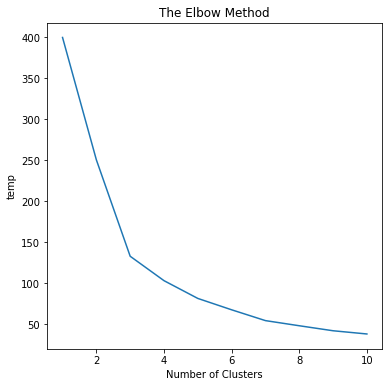

In [26]:
temp = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 100)
    kmeans.fit(data)
    temp.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (6, 6)
plt.title('The Elbow Method')
plt.plot(range(1, 11), temp)
plt.xlabel('Number of Clusters')
plt.ylabel('temp')
plt.show()

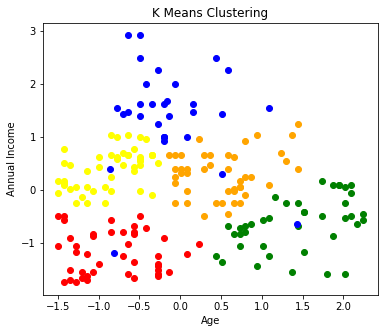

In [27]:
kmeans = KMeans(n_clusters = 5, max_iter = 300, n_init = 10, random_state = 100)
obj = kmeans.fit_predict(data)

plt.figure(figsize=(6,5))
plt.scatter(data[obj == 0, 0], data[obj == 0, 1], c = 'Red')
plt.scatter(data[obj == 1, 0], data[obj == 1, 1], c = 'Blue')
plt.scatter(data[obj == 2, 0], data[obj == 2, 1], c = 'Green')
plt.scatter(data[obj == 3, 0], data[obj == 3, 1], c = 'Yellow')
plt.scatter(data[obj == 4, 0], data[obj == 4, 1], c = 'Orange')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], c = 'blue')

plt.title('K Means Clustering')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

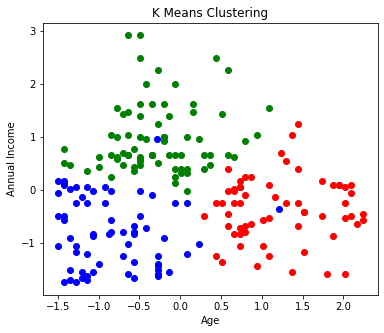

In [28]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 100)
obj = kmeans.fit_predict(data)

plt.figure(figsize=(6,5))
plt.scatter(data[obj == 0, 0], data[obj == 0, 1], c = 'Red')
plt.scatter(data[obj == 1, 0], data[obj == 1, 1], c = 'Blue')
plt.scatter(data[obj == 2, 0], data[obj == 2, 1], c = 'Green')
plt.scatter(data[obj == 3, 0], data[obj == 3, 1], c = 'Yellow')
plt.scatter(data[obj == 4, 0], data[obj == 4, 1], c = 'Orange')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], c = 'blue')

plt.title('K Means Clustering')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

### Inference: Clusters on Age & Annual Income are not so seperable, hence this is of less use for business purpose

# Clustering for Annual Income & Spending is good to go

In [29]:
data = df.iloc[:, [3,4]].values

#### Finding the optimal K value using Elbow curve method

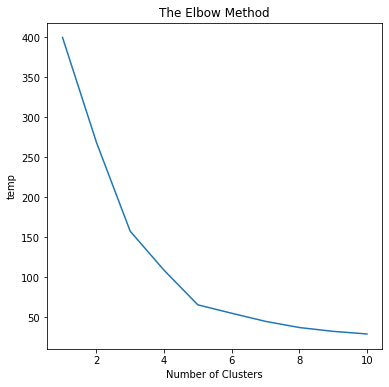

In [30]:
temp = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 100)
    kmeans.fit(data)
    temp.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (6, 6)
plt.title('The Elbow Method')
plt.plot(range(1, 11), temp)
plt.xlabel('Number of Clusters')
plt.ylabel('temp')
plt.show()

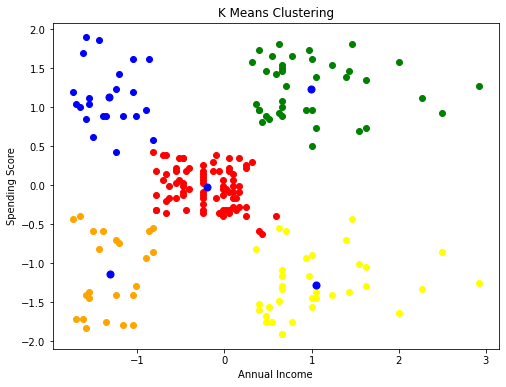

In [31]:
kmeans = KMeans(n_clusters = 5, max_iter = 300, n_init = 10, random_state = 100)
obj = kmeans.fit_predict(data)

plt.figure(figsize=(8,6))
plt.scatter(data[obj == 0, 0], data[obj == 0, 1], c = 'Red')
plt.scatter(data[obj == 1, 0], data[obj == 1, 1], c = 'Blue')
plt.scatter(data[obj == 2, 0], data[obj == 2, 1], c = 'Green')
plt.scatter(data[obj == 3, 0], data[obj == 3, 1], c = 'Yellow')
plt.scatter(data[obj == 4, 0], data[obj == 4, 1], c = 'Orange')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, c = 'blue')

plt.title('K Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

## Hierarchical Clustering

#### Let's perform hierarchical clustering on the same Annual Income & Spending Score

In [32]:
data = df.iloc[:, [3,4]].values

#### Finding the optimal number of clusters using Dendrogram

In [33]:
import scipy.cluster.hierarchy as sch

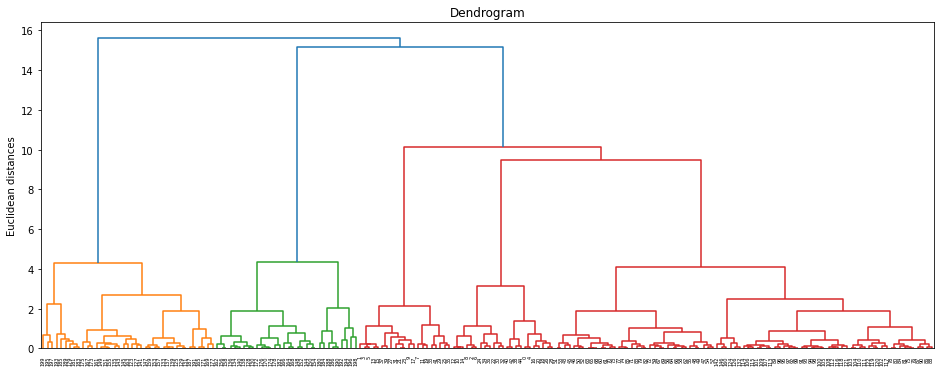

In [34]:
plt.figure(figsize=(16,6))
dendogram = sch.dendrogram(sch.linkage(data, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

In [35]:
from sklearn.cluster import AgglomerativeClustering

In [36]:
cluster = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
obj = cluster.fit_predict(data)

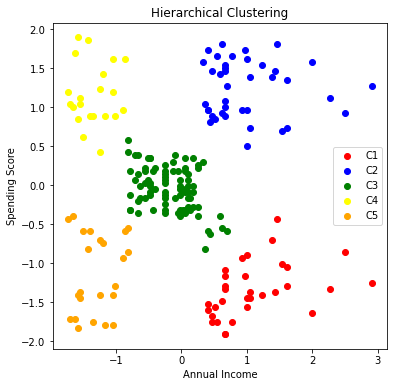

In [37]:
plt.scatter(data[obj == 0, 0], data[obj == 0, 1], c = 'Red', label = 'C1')
plt.scatter(data[obj == 1, 0], data[obj == 1, 1], c = 'Blue', label = 'C2')
plt.scatter(data[obj == 2, 0], data[obj == 2, 1], c = 'Green', label = 'C3')
plt.scatter(data[obj == 3, 0], data[obj == 3, 1], c = 'Yellow', label = 'C4')
plt.scatter(data[obj == 4, 0], data[obj == 4, 1], c = 'Orange', label = 'C5')
plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()